In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [2]:
data_train=pd.read_csv('d:\GB course\TV\kurs\google-play-store-apps\googleplaystore.csv')

In [3]:
# App - название приложения
# Category - категория приложения
# Rating - рейтинг приложения (считается по количеству звездочек)
# Reviews - похоже это количество отзывов к приложению
# Size - размер приложения
# Installs - количество установок приложения
# Type - тип платный/бесплатный
# Price - цена приложения
# Content Rating - возрастной ценз, для всех, 18+ и т.д.
# Genres - жанр. сильно коррелирует с категорией. но жанр это дерево, т.е. значения через разделитель ";"
# Last Updated - дата последнего обновления в апсторе
# Current Ver - текущая версия приложения в апсторе
# Android Ver - версия этого же приложения в плеймаркете.

In [4]:
#часть данных пустая, это видно по количеству записей
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## причесали данные

In [5]:
#вот тут вся запись кривая. все сдвинуто на столбец влево. Удалять не буду, сдвину руками вправо. 
data_train.loc[10472,'Android Ver'] = data_train.loc[10472,'Current Ver']
data_train.loc[10472,'Current Ver'] = data_train.loc[10472,'Last Updated']
data_train.loc[10472,'Last Updated'] = data_train.loc[10472,'Genres']
data_train.loc[10472,'Genres'] =  'Lifestyle' # тут ставлю руками, потому что в таблице нулл 
data_train.loc[10472,'Content Rating'] = data_train.loc[10472,'Price']
data_train.loc[10472,'Price'] = data_train.loc[10472,'Type']
data_train.loc[10472,'Type'] = data_train.loc[10472,'Installs']
data_train.loc[10472,'Installs'] = data_train.loc[10472,'Size']
data_train.loc[10472,'Size'] = data_train.loc[10472,'Reviews']
data_train.loc[10472,'Reviews'] = data_train.loc[10472,'Rating']
data_train.loc[10472,'Rating'] = np.float64(data_train.loc[10472,'Category'])
data_train.loc[10472,'Category'] = 'LIFESTYLE' # тут тоже ставлю руками, потому что в таблице нулл 

In [6]:
#типы. есть 1 проблемная запись с пустым типом 
#ставлю тип 'Free'     
data_train.loc[data_train['Type'].isnull(),'Type'] = 'Free'     

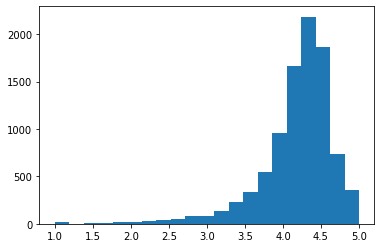

In [7]:
# очень много пустых рейтингов. 10841 - 9367 = 1474
# посмотрим на эти данные сейчас. 
# график рейтингов похож на нормальное распределение
plt.hist(data_train['Rating'], bins = 21)
plt.show()

In [8]:
# есть ли данные с рейтингом 0?
# таких данных нет. похоже 0, это если рейтинг отсутствует, т.е. пользователи не оценивали приложение
# значит корректно будет если мы поставим этим данным 0, вместо null
data_train.loc[data_train['Rating'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


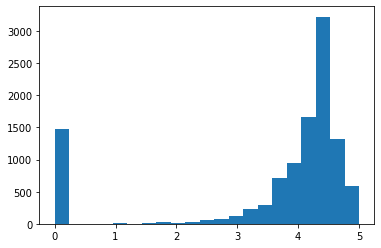

In [9]:
# если пустым рейтингам поставить 0, то на нормальное распределение уже будет сильно меньше похоже
data_train.loc[data_train['Rating'].isnull(),'Rating'] = 0
plt.hist(data_train['Rating'], bins = 21)
plt.show()

In [10]:
#Current Ver. Android Ver. Текущая версия приложения в апсторе и в плеймаркете. 
#есть пустые записи
#версии ставятся вообще какие угодно. 
#версия в плеймаркете с версией андроида тоже никак не соотносится, одна может быть 8, вторая 1.
#поставим пустым версиям и там и там 0.0.1
data_train.loc[data_train['Current Ver'].isnull(),'Current Ver'] = '0.0.1'
data_train.loc[data_train['Android Ver'].isnull(),'Android Ver'] = '1.0 and up'

In [11]:
#на этом с пустыми записями мы закончили, больше их нет
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## преобразовали типы

In [12]:
#преобразовываем типы где можем. 
#Reviews - количество отзывов. преобразовываем в целое число. сейчас тип object
data_train.loc[:,'Reviews'] = data_train.loc[:,'Reviews'].astype(np.int64)

In [13]:
# Installs - количество установок приложения
# у поля Installs надо убрать плюсы где есть, убрать разделители запятые и преобразовать
# преобразовываем в целое число. сейчас тип object
data_train['Installs_int'] = data_train['Installs'].apply(lambda x: x.replace('+','').replace(',','')).astype(np.int64)

In [14]:
# вообще конечно в количестве установок плюс означает "больше чем"
# то есть 1+ это больше 1, но меньше 10
# и отбрасывая "+" мы получаем часть некооректных записей, у которых количество отзывов больше чем количество установок
# но таких записей не много, мы оставим как есть
data_train.loc[data_train['Reviews'] > data_train['Installs_int']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1+,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up,1
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,0.0,4,64M,1+,Free,0,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up,1
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,"10,000+",Paid,$2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device,10000
5812,AX Watch for WatchMaker,PERSONALIZATION,0.0,2,238k,1+,Paid,$0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up,1
5917,Ra Ga Ba,GAME,5.0,2,20M,1+,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up,1
6508,Sam.BN Pro,TOOLS,0.0,11,2.0M,10+,Paid,$0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up,10
6700,Brick Breaker BR,GAME,5.0,7,19M,5+,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up,5
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10+,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,10
8591,DN Blog,SOCIAL,5.0,20,4.2M,10+,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up,10
9096,DZ Puzzle,FAMILY,0.0,14,47M,10+,Paid,$0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up,10


In [15]:
# Price - цена приложения
# содержит знак доллара. уберем его и преобразуем
# преобразовываем в нецелое число. сейчас тип object
data_train['Price_float'] = data_train['Price'].apply(lambda x: x.replace('$','')).astype(np.float32)

In [16]:
# проверим как тип соотносится с ценой. есть ли записи у который тип бесплатная, но стоит цена
# таких записей нет
data_train.loc[(data_train['Price_float'] > 0) & (data_train['Type'] == 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int,Price_float


In [17]:
# проверим наоборот. есть ли записи у который тип платная, но цена 0
# таких записей нет
data_train.loc[(data_train['Price_float'] == 0) & (data_train['Type'] != 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int,Price_float


## посмотрим внимательно на данные. Рейтинг, цена, количество установок, количество отзывов

In [18]:
# посомтрим на матрицу корреляции
# получается у нас больше всего коррелирует на данный момент количество установок и количество отзывов
# и это логично, чем больше приложение ставят, тем больше отзывов
# а вот рейтинг не коррелирует ни с чем
data_train.corr()

,Rating,Reviews,Installs_int,Price_float
Rating,1.000000,0.078613,0.084643,-0.016338
Reviews,0.078613,1.000000,0.643123,-0.009666
Installs_int,0.084643,0.643123,1.000000,-0.011688
Price_float,-0.016338,-0.009666,-0.011688,1.000000


In [19]:
#в таблице видим среднее арифметическое и среднее квадратичное отклонение
data_train.describe()

,Rating,Reviews,Installs_int,Price_float
count,10841.000000,1.084100e+04,1.084100e+04,10841.000000
mean,3.621612,4.441119e+05,1.546291e+07,1.027282
std,1.514584,2.927629e+06,8.502557e+07,15.948182
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Рейтинг

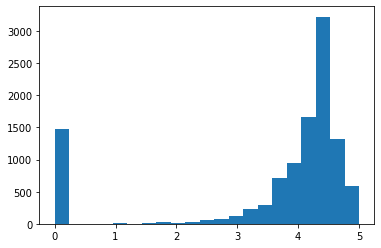

In [20]:
# посмотрим на эти данные
# рейтинг уже смотрели. +- похож на нормальное распределение
plt.hist(data_train['Rating'], bins = 21)
plt.show()

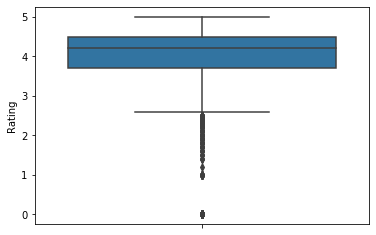

In [21]:
# посмотрим на рейтинг на другом графике
sns.boxplot(data_train['Rating'], orient='v')
plt.show()

In [22]:
# посчитаем основные показатели
def stat_ind(a):
    print("мат ожидание: ", a.mean()) # мат ожидание/среднее арифметическое
    print("среднее квадратичное отклонение: ", a.std(ddof=0)) # среднее квадратичное отклонение
    print("смещенная оценка дисперсии: ", a.var(ddof=0)) # смещенная оценка дисперсии
    print("несмещенная оценка дисперсии: ", a.var(ddof=1)) #несмещенная оценка дисперсии
    print("медиана: ", a.median()) #медиана
    print("мода: ", a.mode()) #мода

In [23]:
# основные показатели для рейтинга
stat_ind(data_train['Rating'])

мат ожидание:  3.6216123973803205
среднее квадратичное отклонение:  1.5145138072176427
смещенная оценка дисперсии:  2.293752072252879
несмещенная оценка дисперсии:  2.2939636729975517
медиана:  4.2
мода:  0    0.0
dtype: float64


### Количество отзывов

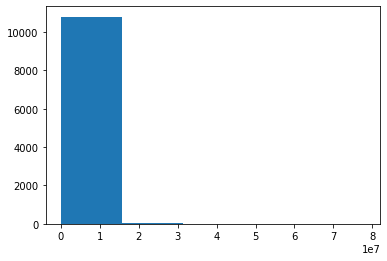

In [24]:
# количество отзывов. на нормальное распределение не похоже
# больша часть значений лежит на промежутке от 0 до 10 000 000
plt.hist(data_train['Reviews'], bins = 5)
plt.show()

In [25]:
# количество отзывов. есть 92 записи, у которых количество отзывов > 10 000 000.0
# ну то есть таких записей правда много, нет смысла смотреть на них детально
len(data_train.loc[data_train['Reviews'] > 10000000])

92

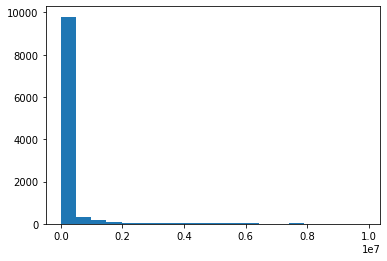

In [26]:
# посмотрим на количество отзывов в промежутке от 0 до 10 000 000.0
plt.hist(data_train.loc[data_train['Reviews'] < 10000000, 'Reviews'], bins = 20)
plt.show()

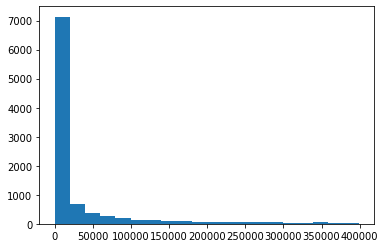

In [27]:
# посмотрим на количество отзывов в промежутке от 0 до 400 000
# в общем точно не похоже нормальное распределение
plt.hist(data_train.loc[data_train['Reviews'] < 400000, 'Reviews'], bins = 20)
plt.show()

In [28]:
# посчитаем основные показатели для количества отзывов
stat_ind(data_train['Reviews'])

мат ожидание:  444111.9280509178
среднее квадратичное отклонение:  2927493.635094005
смещенная оценка дисперсии:  8570218983515.913
несмещенная оценка дисперсии:  8571009594123.249
медиана:  2094.0
мода:  0    0
dtype: int64


### Количество установок

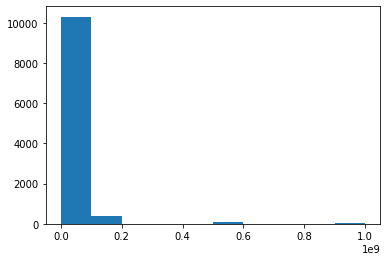

In [29]:
# количество установок. на нормальное распределение так же не похоже
# примерно такая же картина как у отзывов. есть аномальные значения.
# большая часть значений на промежутке до 200 000 000
# в общем тоже не похоже нормальное распределение
plt.hist(data_train['Installs_int'], bins = 10)
plt.show()

In [30]:
# количество установок. есть 130 записи, у которых количество отзывов > 200 000 000.0
# ну то есть таких записей правда много, нет смысла смотреть на них детально
len(data_train.loc[data_train['Installs_int'] > 200000000])

130

In [31]:
# посчитаем основные показатели для количества установок
stat_ind(data_train['Installs_int'])

мат ожидание:  15462912.50687206
среднее квадратичное отклонение:  85021647.41960888
смещенная оценка дисперсии:  7228680529944284.0
несмещенная оценка дисперсии:  7229347382391695.0
медиана:  100000.0
мода:  0    1000000
dtype: int64


### Цена приложения

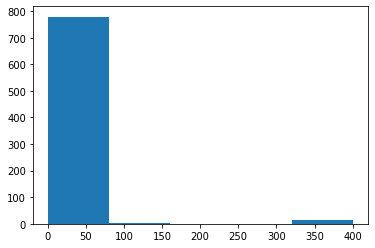

In [32]:
# цена приложения. на нормальное распределение так же не похоже
plt.hist(data_train.loc[data_train['Type'] != 'Free', 'Price_float'], bins = 5)
plt.show()

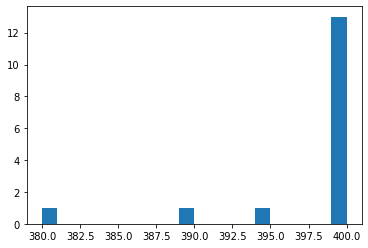

In [33]:
# цена приложения. есть несколько значений больше 300, их не много
plt.hist(data_train.loc[data_train['Price_float'] > 300, 'Price_float'], bins = 20)
plt.show()

In [34]:
# посмотрим на эти аномальные данные
# приложение называется I'm rich
# РЕАЛЬНО ЕСТЬ ТАКОЕ ПРИЛОЖЕНИЕ (правда не в русском маркете)!!!!!!!!!!!!!!!! =)))))))
# https://lpgenerator.ru/blog/2016/04/28/ya-bogat-ili-sekretnaya-mantra-za-1-000/
# приложение, которое ничего не делает, но стоит кучу денег и люди его ставят!!!! чтоб я так жила...
data_train.loc[data_train['Price_float'] > 300]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int,Price_float
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,$399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,100,399.98999
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,10000,399.98999
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000,400.00000
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,100000,399.98999
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000,399.98999
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,$399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,50000,399.98999
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,$379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,1000,379.98999
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,$399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,1000,399.98999
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,$399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,5000,399.98999
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,$399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,5000,399.98999


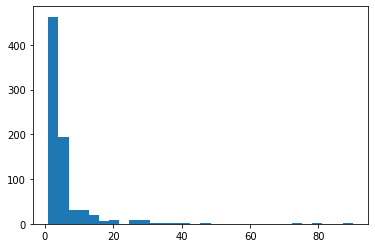

In [35]:
# посмотрим на нормальные цены, по приложениям для нормальных людей, не за 400$
# большинство цен все-таки в промежутке  до 20$
plt.hist(data_train.loc[(data_train['Type'] != 'Free')&(data_train['Price_float'] < 100), 'Price_float'], bins = 30)
plt.show()

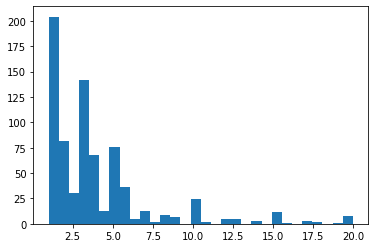

In [36]:
# большинство цен все-таки в промежутке  до 20$,смотрим на такие цены поближе
# и все равно распределение цен на нормальное не похоже...
plt.hist(data_train.loc[(data_train['Type'] != 'Free')&(data_train['Price_float'] < 20), 'Price_float'], bins = 30)
plt.show()

In [37]:
# посчитаем основные показатели для цены
stat_ind(data_train['Price_float'])

мат ожидание:  1.0272822380065918
среднее квадратичное отклонение:  15.9474458694458
смещенная оценка дисперсии:  254.321044921875
несмещенная оценка дисперсии:  254.34451293945312
медиана:  0.0
мода:  0    0.0
dtype: float32


### Производные данные. Категории.

In [38]:
# сколько всего приложений в каждой категории???
cat_cnt = data_train.groupby(['Category'])['App'].count()
cat_cnt

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               383
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
Name: App, dtype: int64

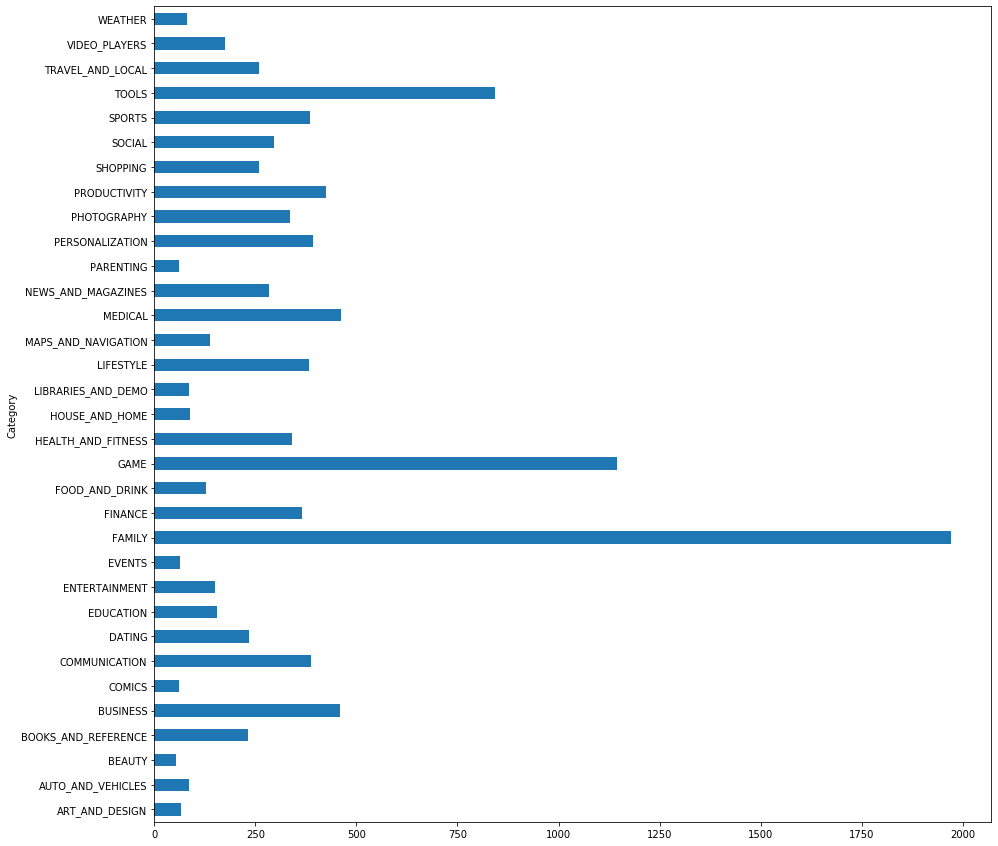

In [39]:
# сколько всего приложений в каждой категории - посмотрим на графике
rcParams["figure.figsize"] = 15, 15
cat_cnt.plot(kind="barh")
plt.show()

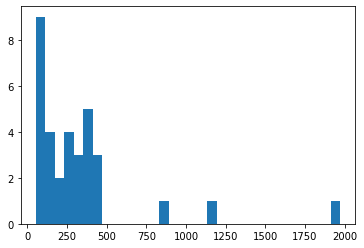

In [40]:
# сколько всего приложений в каждой категории - посмотрим на графике
rcParams["figure.figsize"] = 6, 4
plt.hist(cat_cnt, bins = 32)
plt.show()

In [41]:
# посчитаем основные показатели количества приложений по категориям
stat_ind(cat_cnt)

мат ожидание:  328.5151515151515
среднее квадратичное отклонение:  368.50328901226356
смещенная оценка дисперсии:  135794.67401285583
несмещенная оценка дисперсии:  140038.25757575757
медиана:  258.0
мода:  0    60
1    85
dtype: int64


In [42]:
# посчитаем средний рейтинг по категориям
cat_mn = data_train.groupby(['Category'])['Rating'].mean()
cat_mn

Category
ART_AND_DESIGN         4.156923
AUTO_AND_VEHICLES      3.598824
BEAUTY                 3.390566
BOOKS_AND_REFERENCE    3.348918
BUSINESS               2.714783
COMICS                 4.016667
COMMUNICATION          3.524548
DATING                 3.308974
EDUCATION              4.360897
ENTERTAINMENT          4.126174
EVENTS                 3.118750
FAMILY                 3.713945
FINANCE                3.646448
FOOD_AND_DRINK         3.576378
GAME                   4.110227
HEALTH_AND_FITNESS     3.725220
HOUSE_AND_HOME         3.625000
LIBRARIES_AND_DEMO     3.195294
LIFESTYLE              3.362141
MAPS_AND_NAVIGATION    3.667153
MEDICAL                3.166739
NEWS_AND_MAGAZINES     3.402120
PARENTING              3.583333
PERSONALIZATION        3.473214
PHOTOGRAPHY            3.966866
PRODUCTIVITY           3.486321
SHOPPING               3.899231
SOCIAL                 3.736271
SPORTS                 3.508594
TOOLS                  3.524081
TRAVEL_AND_LOCAL       3.599612

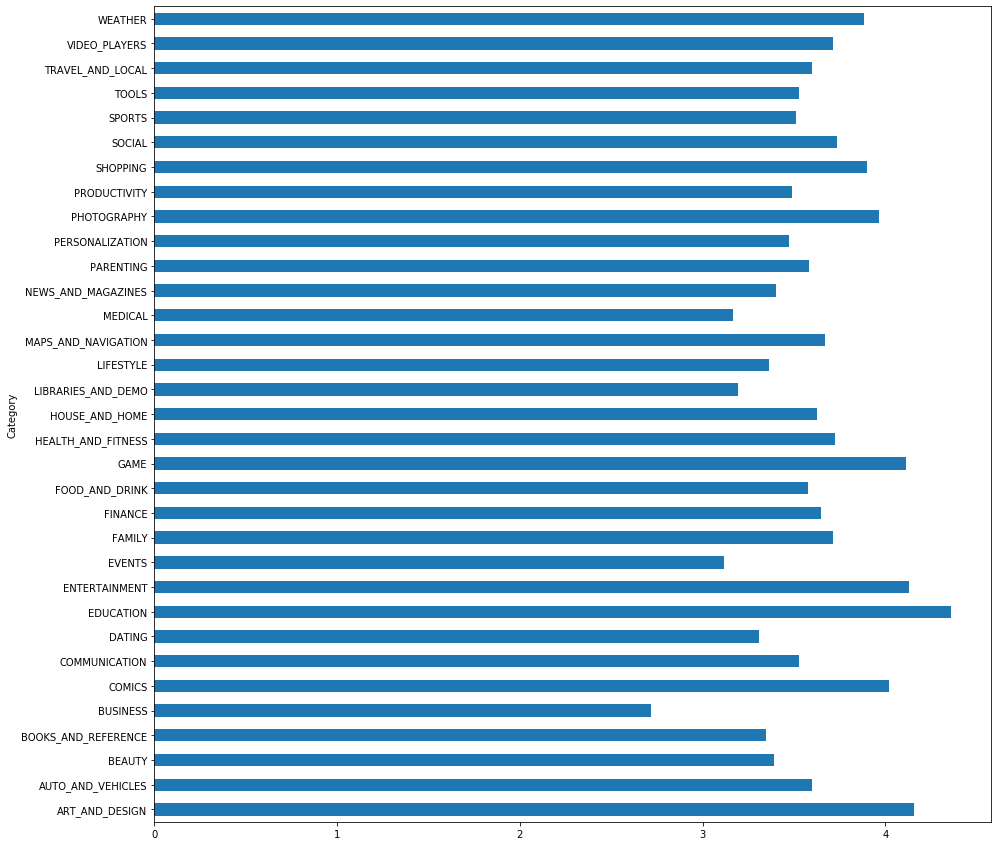

In [43]:
# средний рейтинг по категориям - посомтрим на графике
rcParams["figure.figsize"] = 15, 15
cat_mn.plot(kind="barh")
plt.show()

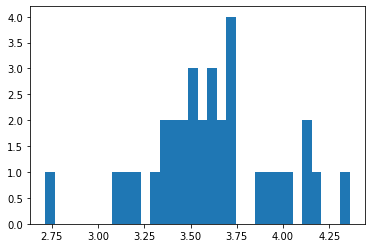

In [44]:
# средний рейтинг по категориям - посмотрим на графике
# слегка похож на нормальное распределение
rcParams["figure.figsize"] = 6, 4
plt.hist(cat_mn, bins = 32)
plt.show()

In [45]:
# посчитаем основные показатели для среднего рейтинга по категориям
# моды вообще нет, получается, выводит все значения
stat_ind(cat_cnt)

мат ожидание:  328.5151515151515
среднее квадратичное отклонение:  368.50328901226356
смещенная оценка дисперсии:  135794.67401285583
несмещенная оценка дисперсии:  140038.25757575757
медиана:  258.0
мода:  0    60
1    85
dtype: int64


In [46]:
# посчитаем среднюю цену по категориям
cat_pr_mn = data_train.groupby(['Category'])['Price_float'].mean()
cat_pr_mn

Category
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.518485
BUSINESS               0.402761
COMICS                 0.000000
COMMUNICATION          0.214832
DATING                 0.134316
EDUCATION              0.115128
ENTERTAINMENT          0.053557
EVENTS                 1.718594
FAMILY                 1.234675
FINANCE                7.925765
FOOD_AND_DRINK         0.066772
GAME                   0.251136
HEALTH_AND_FITNESS     0.197478
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.164151
MAPS_AND_NAVIGATION    0.196715
MEDICAL                3.110065
NEWS_AND_MAGAZINES     0.014064
PARENTING              0.159667
PERSONALIZATION        0.392755
PHOTOGRAPHY            0.400627
PRODUCTIVITY           0.591816
SHOPPING               0.021077
SOCIAL                 0.054136
SPORTS                 0.260417
TOOLS                  0.317023
TRAVEL_AND_LOCAL       0.193605

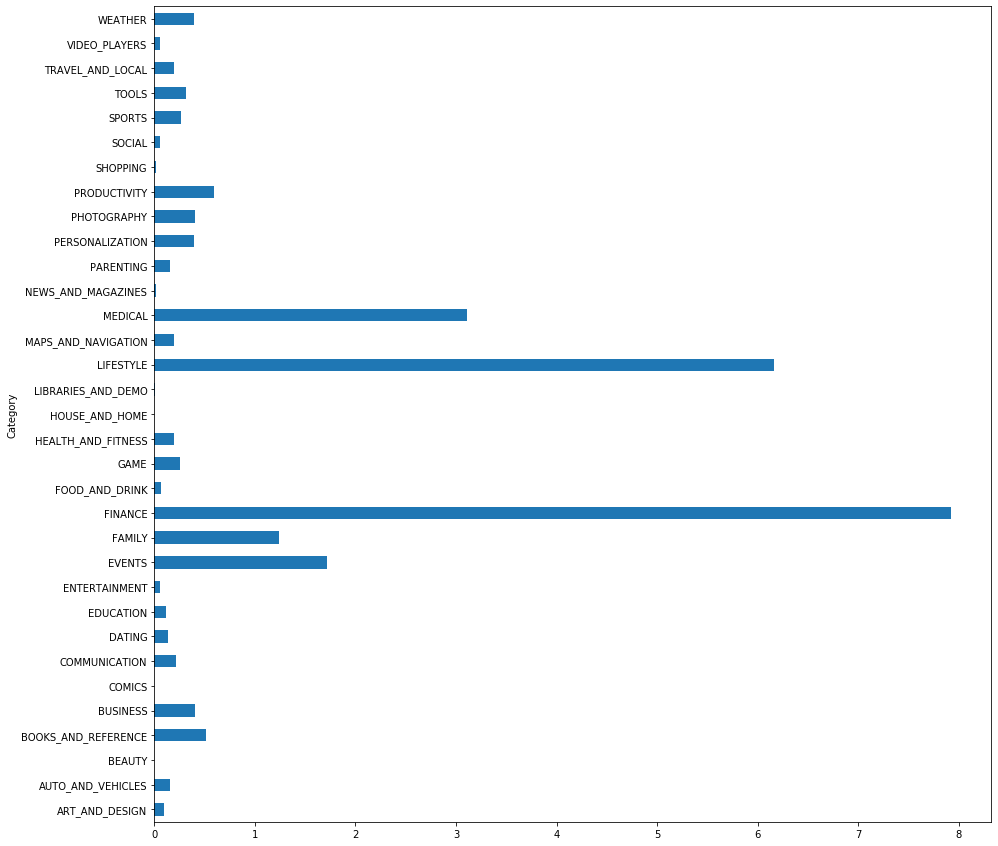

In [47]:
# средняя цена по категориям - посмотрим на графике
rcParams["figure.figsize"] = 15, 15
cat_pr_mn.plot(kind="barh")
plt.show()

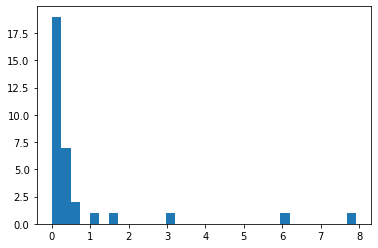

In [48]:
# средняя цена по категориям - посмотрим на графике
rcParams["figure.figsize"] = 6, 4
plt.hist(cat_pr_mn, bins = 32)
plt.show()

In [49]:
# посчитаем основные показатели для средней цены по категориям
stat_ind(cat_pr_mn)

мат ожидание:  0.7705065608024597
среднее квадратичное отклонение:  1.7155578136444092
смещенная оценка дисперсии:  2.943138599395752
несмещенная оценка дисперсии:  3.035111665725708
медиана:  0.1967153251171112
мода:  0    0.0
dtype: float32


In [50]:
# посчитаем среднее количество просмотров по категориям
cat_rv_mn = data_train.groupby(['Category'])['Reviews'].mean()
cat_rv_mn

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.363656e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

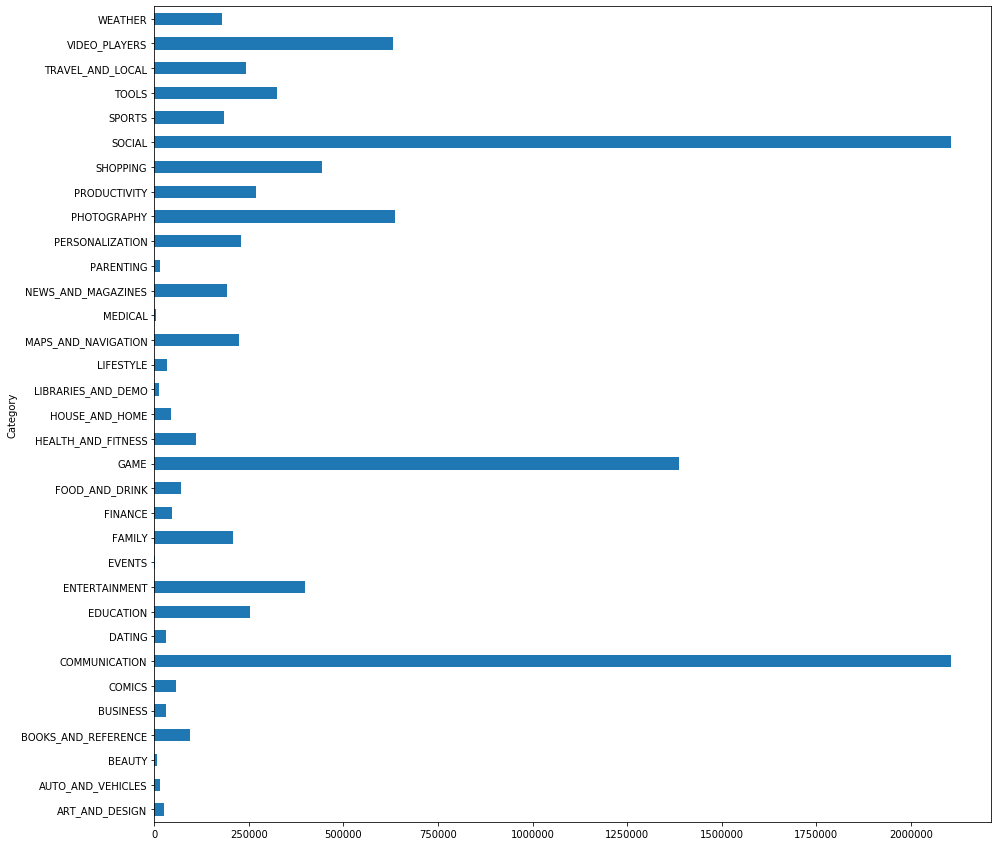

In [51]:
# среднее количество просмотров по категориям - посмотрим на графике
rcParams["figure.figsize"] = 15, 15
cat_rv_mn.plot(kind="barh")
plt.show()

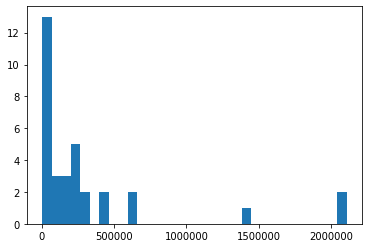

In [52]:
# среднее количество просмотров по категориям - посмотрим на графике
rcParams["figure.figsize"] = 6, 4
plt.hist(cat_rv_mn, bins = 32)
plt.show()

In [53]:
# посчитаем основные показатели для среднего количества просмотров по категориям
# опять нет моды
stat_ind(cat_rv_mn)

мат ожидание:  321616.70324260765
среднее квадратичное отклонение:  525892.8936523382
смещенная оценка дисперсии:  276563335594.02954
несмещенная оценка дисперсии:  285205939831.34296
медиана:  178106.5243902439
мода:  0     2.515906e+03
1     3.425432e+03
2     7.476226e+03
3     1.220139e+04
4     1.369019e+04
5     1.597218e+04
6     2.637600e+04
7     3.033598e+04
8     3.115931e+04
9     3.363656e+04
10    4.518619e+04
11    4.795281e+04
12    5.638793e+04
13    6.994748e+04
14    9.506090e+04
15    1.111253e+05
16    1.781065e+05
17    1.844536e+05
18    1.922292e+05
19    2.080255e+05
20    2.237902e+05
21    2.279238e+05
22    2.427051e+05
23    2.538191e+05
24    2.691438e+05
25    3.240629e+05
26    3.971688e+05
27    4.424662e+05
28    6.307439e+05
29    6.373631e+05
30    1.385859e+06
31    2.105903e+06
32    2.107138e+06
dtype: float64


In [54]:
# посчитаем среднее количество скачиваний по категориям
cat_i_mn = data_train.groupby(['Category'])['Installs_int'].mean()
cat_i_mn

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.403772e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

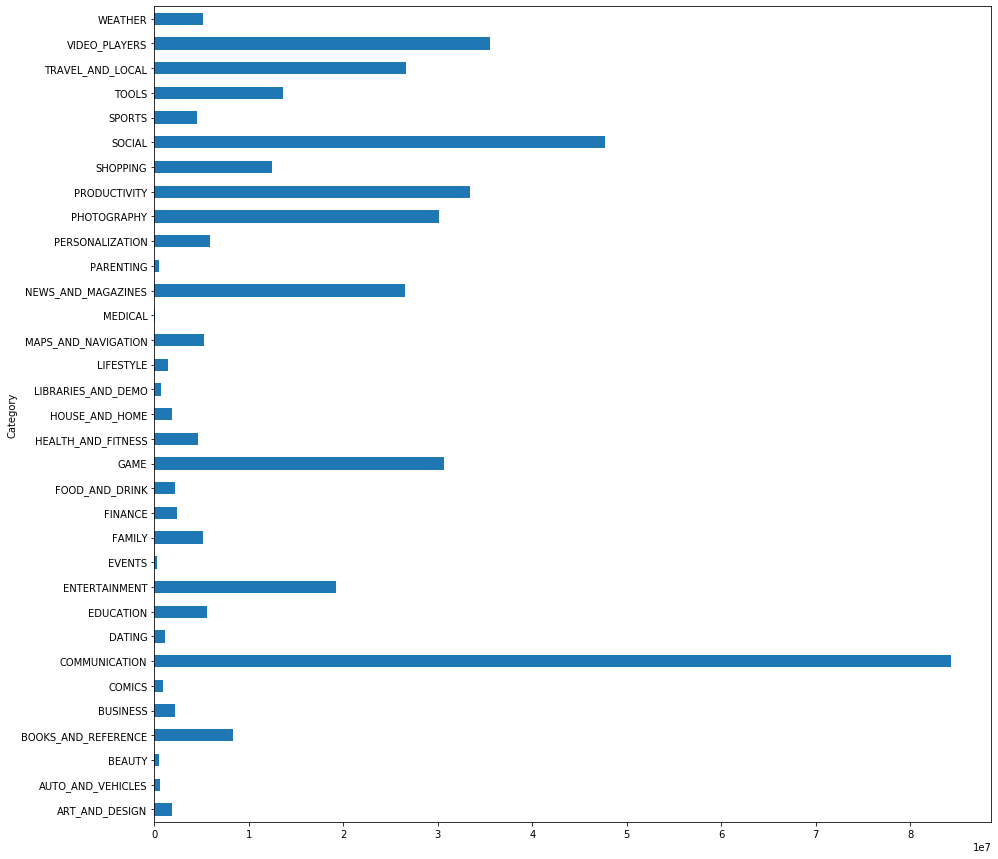

In [55]:
# среднее количество скачиваний по категориям - посмотрим на графике
rcParams["figure.figsize"] = 15, 15
cat_i_mn.plot(kind="barh")
plt.show()

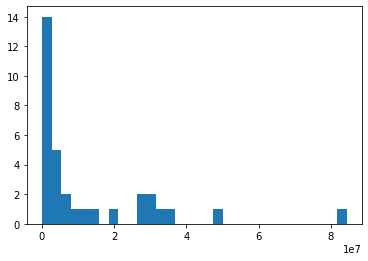

In [56]:
# среднее количество скачиваний по категориям - посмотрим на графике
rcParams["figure.figsize"] = 6, 4
plt.hist(cat_i_mn, bins = 32)
plt.show()

In [57]:
# посчитаем основные показатели для среднего количества скачиваний по категориям
# опять нет моды
stat_ind(cat_i_mn)

мат ожидание:  12781649.84056345
среднее квадратичное отклонение:  17955786.950270787
смещенная оценка дисперсии:  322410285003514.7
несмещенная оценка дисперсии:  332485606409874.5
медиана:  5196347.804878049
мода:  0     1.150269e+05
1     2.495806e+05
2     5.131519e+05
3     5.253518e+05
4     6.250613e+05
5     7.411284e+05
6     9.347692e+05
7     1.129533e+06
8     1.403772e+06
9     1.912894e+06
10    1.917187e+06
11    2.156683e+06
12    2.178076e+06
13    2.395215e+06
14    4.560350e+06
15    4.642441e+06
16    5.196348e+06
17    5.201959e+06
18    5.286729e+06
19    5.586231e+06
20    5.932385e+06
21    8.318050e+06
22    1.249173e+07
23    1.358573e+07
24    1.925611e+07
25    2.648876e+07
26    2.662359e+07
27    3.011417e+07
28    3.066960e+07
29    3.343418e+07
30    3.555430e+07
31    4.769447e+07
32    8.435989e+07
dtype: float64


In [58]:
# было бы интересно посмотреть на корреляцию средних параметров по категориям с остальными параметрами
# для этого добавим их в таблицу и потом посмотрим матрицу корреляции
# все возможные категории
all_cats = data_train['Category'].unique()

j = 0
# посчитаем среднее для каждой категории
for i in all_cats:
    data_train.loc[data_train['Category'] == i,'Category_inst'] = data_train.loc[data_train['Category'] == i,'Installs_int'].mean()
    data_train.loc[data_train['Category'] == i,'Category_rew'] = data_train.loc[data_train['Category'] == i,'Reviews'].mean()
    data_train.loc[data_train['Category'] == i,'Category_prc'] = data_train.loc[data_train['Category'] == i,'Price_float'].mean()
    data_train.loc[data_train['Category'] == i,'Category_rat'] = data_train.loc[data_train['Category'] == i,'Rating'].mean()  

In [59]:
# посмотрим матрицу корреляции
# старое: коррелируют количество инвталяций с количеством отзывов 
# новое: теперь среднее количество инсталяций по категориям коррелирует с средним количеством отзывов по категориям...
# новое: слегка коррелирует средний рейтинг по категориям со средним количеством отзывов по категориям
data_train.corr()

,Rating,Reviews,Installs_int,Price_float,Category_inst,Category_rew,Category_prc,Category_rat
Rating,1.000000,0.078613,0.084643,-0.016338,0.056058,0.093195,-0.038072,0.213899
Reviews,0.078613,1.000000,0.643123,-0.009666,0.171733,0.198426,-0.057417,0.086453
Installs_int,0.084643,0.643123,1.000000,-0.011688,0.216023,0.186963,-0.067473,0.056615
Price_float,-0.016338,-0.009666,-0.011688,1.000000,-0.034903,-0.032335,0.111746,-0.019890
Category_inst,0.056058,0.171733,0.216023,-0.034903,1.000000,0.865477,-0.312341,0.262079
Category_rew,0.093195,0.198426,0.186963,-0.032335,0.865477,1.000000,-0.289362,0.435697
Category_prc,-0.038072,-0.057417,-0.067473,0.111746,-0.312341,-0.289362,1.000000,-0.177992
Category_rat,0.213899,0.086453,0.056615,-0.019890,0.262079,0.435697,-0.177992,1.000000


## Производные данные. Жанр.

In [60]:
# я посмотрела, жанр двухуровневое дерево. 
# разбили дерево на 2 ветки
# при этом приведем жанр к виду категорий, чтобы сравнить. 
# для этого жанр приводим к верхнему регистру и заменяем " & " на "_AND_"
data_train['Genres_0'] = data_train['Genres'].apply(lambda x: x.split(';')[0].upper().replace(" & ", "_AND_"))
data_train['Genres_1'] = data_train['Genres'].apply(lambda x: x.split(';')[1].upper().replace(" & ", "_AND_") if len(x.split(';'))>1 else '-')

In [61]:
# примерно у трети даннх жанр и категория не равны 
len(data_train.loc[data_train['Genres_0'] != data_train['Category'],['Genres_0','Genres_1','Category']])

3291

In [62]:
# посмотрим немного на эти данные
data_train.loc[data_train['Genres_0'] != data_train['Category'],['Genres_0','Genres_1','Category']].head(10)

,Genres_0,Genres_1,Category
1653,ADVENTURE,ACTION_AND_ADVENTURE,GAME
1654,ARCADE,-,GAME
1655,CASUAL,-,GAME
1656,CARD,-,GAME
1657,CASUAL,-,GAME
1658,CASUAL,PRETEND PLAY,GAME
1659,ACTION,-,GAME
1660,STRATEGY,-,GAME
1661,ACTION,-,GAME
1662,CASUAL,-,GAME


In [63]:
# посмотрим на корреляцию данных по жанрам со всеми остальными данными
# добавим их в таблицу и посомтрим на матрицу
all_genres = data_train['Genres_0'].unique()
for i in all_genres:
    data_train.loc[data_train['Genres_0'] == i,'Genres_0_inst'] = data_train.loc[data_train['Genres_0'] == i,'Installs_int'].mean()
    data_train.loc[data_train['Genres_0'] == i,'Genres_0_rew'] = data_train.loc[data_train['Genres_0'] == i,'Reviews'].mean()
    data_train.loc[data_train['Genres_0'] == i,'Genres_0_prc'] = data_train.loc[data_train['Genres_0'] == i,'Price_float'].mean()
    data_train.loc[data_train['Genres_0'] == i,'Genres_0_rat'] = data_train.loc[data_train['Genres_0'] == i,'Rating'].mean()

In [64]:
# посмотрим матрицу корреляции
# старое: коррелируют количество инвталяций с количеством отзывов 
# старое: теперь среднее количество инсталяций по категориям коррелирует с средним количеством отзывов по категориям...
# старое: слегка коррелирует средний рейтинг по категориям со средним количеством отзывов по категориям
# количество установок/отзывов/цена/рейтинг по жанрам и по категориям сильно коррелирует с соответствующими показателями
data_train.corr()

,Rating,Reviews,Installs_int,Price_float,Category_inst,Category_rew,Category_prc,Category_rat,Genres_0_inst,Genres_0_rew,Genres_0_prc,Genres_0_rat
Rating,1.000000,0.078613,0.084643,-0.016338,0.056058,0.093195,-0.038072,0.213899,0.050581,0.083862,-0.040726,0.218069
Reviews,0.078613,1.000000,0.643123,-0.009666,0.171733,0.198426,-0.057417,0.086453,0.171452,0.211876,-0.056503,0.081480
Installs_int,0.084643,0.643123,1.000000,-0.011688,0.216023,0.186963,-0.067473,0.056615,0.219700,0.177784,-0.063250,0.050959
Price_float,-0.016338,-0.009666,-0.011688,1.000000,-0.034903,-0.032335,0.111746,-0.019890,-0.032955,-0.030527,0.114470,-0.021378
Category_inst,0.056058,0.171733,0.216023,-0.034903,1.000000,0.865477,-0.312341,0.262079,0.913713,0.685752,-0.285730,0.215805
Category_rew,0.093195,0.198426,0.186963,-0.032335,0.865477,1.000000,-0.289362,0.435697,0.757715,0.759657,-0.268963,0.384116
Category_prc,-0.038072,-0.057417,-0.067473,0.111746,-0.312341,-0.289362,1.000000,-0.177992,-0.278008,-0.227057,0.959363,-0.134433
Category_rat,0.213899,0.086453,0.056615,-0.019890,0.262079,0.435697,-0.177992,1.000000,0.185710,0.278982,-0.140804,0.873303
Genres_0_inst,0.050581,0.171452,0.219700,-0.032955,0.913713,0.757715,-0.278008,0.185710,1.000000,0.809210,-0.287890,0.231947
Genres_0_rew,0.083862,0.211876,0.177784,-0.030527,0.685752,0.759657,-0.227057,0.278982,0.809210,1.000000,-0.266681,0.384564


## Дисперсионный анализ

In [65]:
# я вот не поняла, как быть если данных ТАК МНОГО... что в таблице смотреть?..

In [66]:
all_cats = data_train['Category'].unique()
def disp_an(col_name): 
    # это все возможные значения, сразу объединили
    y_all = data_train[col_name].values
    # это соответственно общее среднее
    y_mean = np.mean(y_all)
    # это сумма квадратов отклонений наблюдений от общего среднего
    s2 = np.sum((y_all - y_mean)**2)

    s2_f = 0
    s2_residual = 0
    for i in all_cats:
        # взяли ВСЕ значения нужного столбца для определенной категории. т.е. условно вытащили y1,y2...yn
        b = data_train.loc[data_train['Category']==i,col_name].values
        # посчитали в цикле сумму квадратов отклонений средних групповых значений от общего среднего
        # то есть каждую итерацию цикла прибавляем к ней значение для нового массива
        s2_f += ((b.mean() - y_mean)**2)*len(b)
        #  посчитали в цикле остаточную сумму квадратов отклонений
        s2_residual += np.sum((b - b.mean())**2)
    
    # это размер выборки всего
    n = len(data_train) 
    # это получается количество выборок
    k = len(all_cats) 

    # общая дисперсия
    sigma2_general = s2 / (n - 1) 
    # факторная дисперсия
    sigma2_f = s2_f / (k - 1)
    # остаточная дисперсия
    sigma2_residual = s2_residual / (n - k)

    # Fh
    F_h = sigma2_f / sigma2_residual
    #  эмпирическое корреляционное отношение
    eta2 = s2_f / s2


    print('s2: {}, s2_f: {}, s2_residual: {}, s2_f + s2_residual: {}'.format(s2, s2_f, s2_residual, s2_f + s2_residual))
    print('sigma2_general: {}, sigma2_f: {}, sigma2_residual: {}'.format(sigma2_general, sigma2_f, sigma2_residual))
    print('F_h: {}'.format(F_h))
    print('k-1: {}, n-k: {}'.format(k-1, n-k))
    print('eta2: {}'.format(eta2))

In [67]:
disp_an('Rating')

s2: 24866.56621529379, s2_f: 1137.7140884253015, s2_residual: 23728.8521268685, s2_f + s2_residual: 24866.566215293802
sigma2_general: 2.2939636729975823, sigma2_f: 35.55356526329067, sigma2_residual: 2.1954896490440876
F_h: 16.193911585404482
k-1: 32, n-k: 10808
eta2: 0.04575276210535125


In [68]:
disp_an('Reviews')

s2: 9.290974400029685e+16, s2_f: 3658113519776167.0, s2_residual: 8.925163048052069e+16, s2_f + s2_residual: 9.290974400029685e+16
sigma2_general: 8571009594123.325, sigma2_f: 114316047493005.22, sigma2_residual: 8257922879396.807
F_h: 13.843196305237878
k-1: 32, n-k: 10808
eta2: 0.03937276503274489


In [69]:
disp_an('Installs_int')

s2: 7.836612562512429e+19, s2_f: 3.6570383665064883e+18, s2_residual: 7.470908725861782e+19, s2_f + s2_residual: 7.83661256251243e+19
sigma2_general: 7229347382391540.0, sigma2_f: 1.1428244895332776e+17, sigma2_residual: 6912387792248133.0
F_h: 16.532991549098174
k-1: 32, n-k: 10808
eta2: 0.04666606058848004


In [70]:
disp_an('Price_float')

s2: 2757367.0, s2_f: 34431.704939474665, s2_residual: 2722935.518814802, s2_f + s2_residual: 2757367.223754277
sigma2_general: 254.36964944649446, sigma2_f: 1075.9907793585833, sigma2_residual: 251.93703912054053
F_h: 4.270871734916954
k-1: 32, n-k: 10808
eta2: 0.012487167990142286
